Project Guideline
Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

DAVID 10124315

Informasi tambahan,

Copy notebook ini untuk mulai mengerjakan Projectmu.
Kamu bebas untuk menambahkan cell pada notebook.
Data Understanding
Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
sns.set(style='whitegrid')
%matplotlib inline

Mengambil file .csv dari Google Drive kamu.

In [46]:
# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/retail.csv')

In [47]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [49]:
print(df.describe(include='all'))

        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16    CUST1000  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  
unique               

Data Cleaning
Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [50]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [51]:
df.dropna(inplace=True)

In [52]:
df.drop_duplicates(inplace=True)

Exploratory Data Analysis
Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

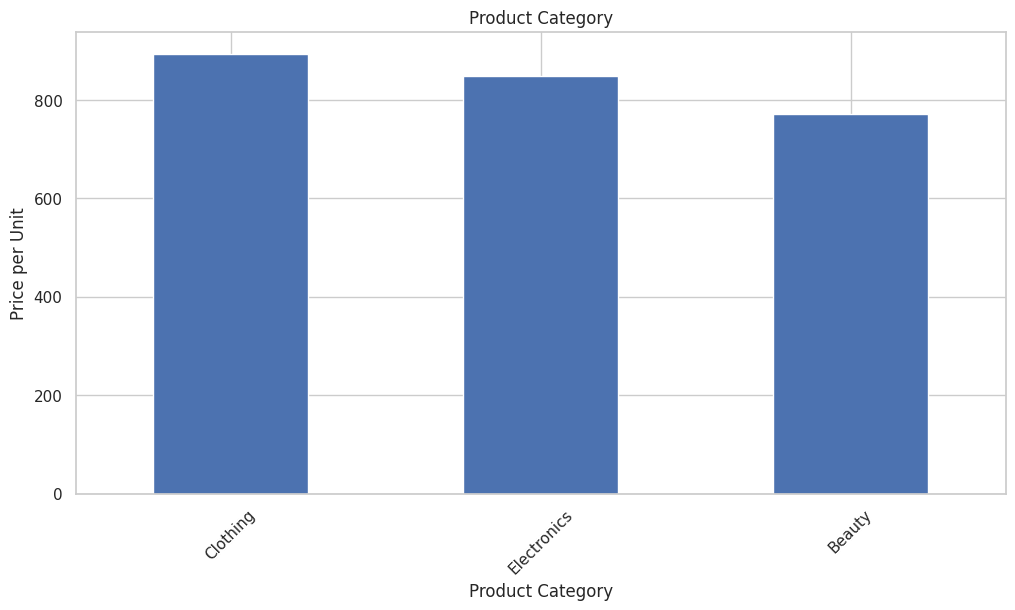

In [57]:
plt.figure(figsize=(12,6))
df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Product Category')
plt.ylabel('Price per Unit')
plt.xticks(rotation=45)
plt.show()

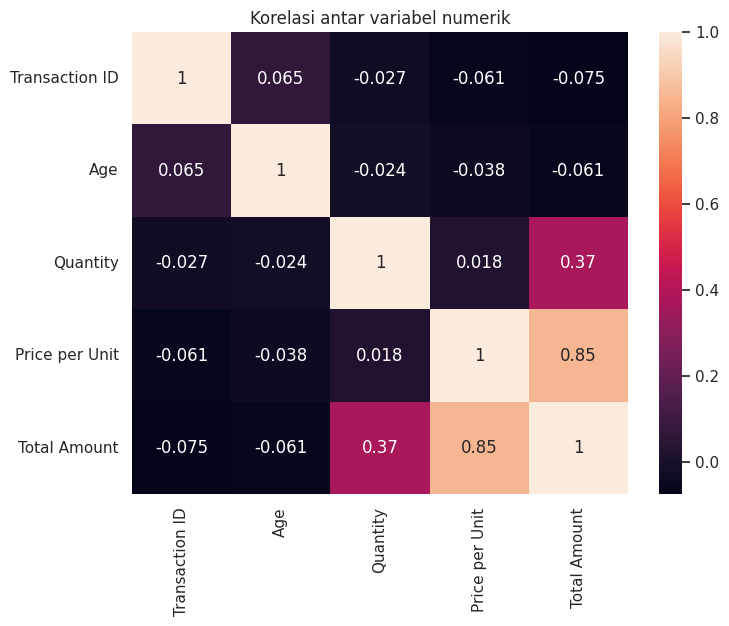

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Korelasi antar variabel numerik')
plt.show()

Data Preparation
Memisahkan data training dan testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df[['Quantity', 'Price per Unit']]  # sesuaikan dengan kolom dataset kamu
y = df['Total Amount']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building
Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluation
Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

MSE: 41860.81317288647
R2 Score: 0.8569981574765705


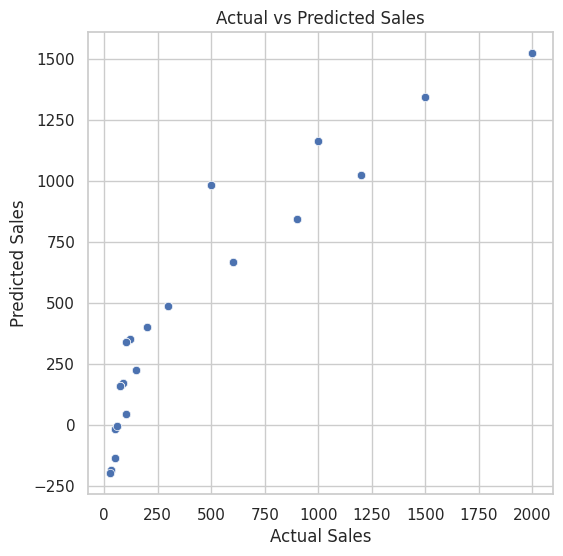

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualisasi prediksi
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [79]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 41860.81317288647
R2 Score: 0.8569981574765705


In [80]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 41860.81317288647
R2 Score: 0.8569981574765705
